<a href="https://colab.research.google.com/github/hitxiaomi/colab_notebooks/blob/main/simple_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):

  def __init__(self, input = 4, h1 = 8, h2 = 16, output = 3):
    super().__init__()
    self.fc1 = nn.Linear(input, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, output)
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [2]:

torch.manual_seed(41)
model = Model()


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_data = pd.read_csv(url)


In [5]:
my_data["variety"] = my_data["variety"].replace("Setosa", 0.0)
my_data["variety"] = my_data["variety"].replace("Versicolor", 1.0)
my_data["variety"] = my_data["variety"].replace("Virginica", 2.0)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [6]:
X = my_data.drop("variety", axis = 1)
y = my_data["variety"]
X = X.values
y = y.values


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)


In [8]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [9]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [10]:
epochs = 200
losses = []
for i in range(epochs):
  y_predict = model.forward(X_train)
  loss = criterion(y_predict, y_train)

  losses.append(loss.detach().numpy())
  if i % 10 == 0:
    print(f"Epoch {i}, losss: {loss}")
  # do back
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch 0, losss: 1.1184707880020142
Epoch 10, losss: 0.8408976197242737
Epoch 20, losss: 0.48962053656578064
Epoch 30, losss: 0.25505441427230835
Epoch 40, losss: 0.12505118548870087
Epoch 50, losss: 0.0731450766324997
Epoch 60, losss: 0.05175985023379326
Epoch 70, losss: 0.04152959585189819
Epoch 80, losss: 0.03577433153986931
Epoch 90, losss: 0.032082751393318176
Epoch 100, losss: 0.029472393915057182
Epoch 110, losss: 0.027490077540278435
Epoch 120, losss: 0.025906993076205254
Epoch 130, losss: 0.024595776572823524
Epoch 140, losss: 0.023504236713051796
Epoch 150, losss: 0.02358265034854412
Epoch 160, losss: 0.022377554327249527
Epoch 170, losss: 0.021344786509871483
Epoch 180, losss: 0.02057199738919735
Epoch 190, losss: 0.020009545609354973


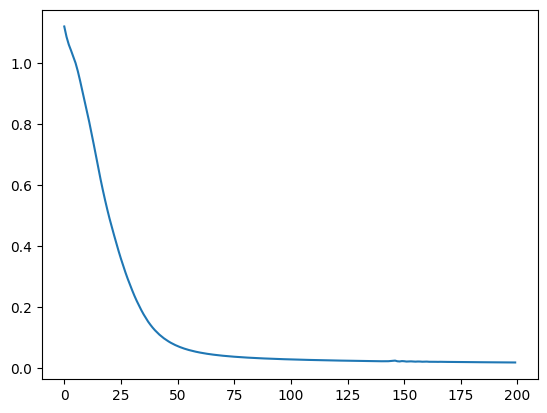

In [11]:
plt.plot(range(epochs), losses)

In [16]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=16, bias=True)
  (out): Linear(in_features=16, out_features=3, bias=True)
)>